**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Procesamiento del Lenguaje Natural**

***
Datos del alumno (Nombre y Apellidos): Araceli Ruiz Vallecillo

Fecha: 16/12/2024
***

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Trabajo: Named-Entity Recognition</span>

**Objetivos**

Con esta actividad se tratará de que el alumno se familiarice con el manejo de la librería spacy, así como con los conceptos básicos de manejo de las técnicas NER

**Descripción**

En esta actividad debes procesar de forma automática un texto en lenguaje natural para detectar características básicas en el mismo, y para identificar y etiquetar las ocurrencias de conceptos como localización, moneda, empresas, etc.

En la primera parte del ejercicio se proporciona un código fuente a través del cual se lee un archivo de texto y se realiza un preprocesado del mismo. En esta parte el alumno tan sólo debe ejecutar y entender el código proporcionado.

En la segunda parte del ejercicio se plantean una serie de preguntas que deben ser respondidas por el alumno. Cada pregunta deberá responderse con un fragmento de código fuente que esté acompañado de la explicación correspondiente. Para elaborar el código solicitado, el alumno deberá visitar la documentación de la librería spacy, cuyos enlaces se proporcionarán donde corresponda.

# Parte 1: carga y preprocesamiento del texto a analizar

Observa las diferentes librerías que se están importando.

In [1]:
import spacy
import pandas as pd
from spacy import displacy
import es_core_news_md

El siguiente código simplemente carga y preprocesa el texto. Para ello, lo primero que hace es cargar un modelo de lenguaje previamente entrenado. En este caso, se utiliza <i>es_core_news_md</i>:

https://spacy.io/models/es#es_core_news_md


In [2]:
nlp = es_core_news_md.load()

El objeto <i>nlp</i> permite utilizar el modelo de lenguaje cargado, de forma que se puede procesar un texto y obtenerlo en su versión preprocesada. Así, nos permite realizar las diferentes tareas. En este caso, vamos a utilizar el pipeline para hacer un preprocesamiento básico, que consiste en tokenizar el texto.

<b>Explicación de problemática con la actividad</b>

Durante el ejercicio debido al gran número de líneas que posee el dataset (unas 600 mil líneas aproximadamente) y trás el limpiado del dataset original, que ahora más adelante explicaré, donde este mismo se queda en un número de líneas de aproximadamente 300 mil líneas, he intentado realizar las diversas actividades con 3 ordenadores de diferentes carácterísticas que son los que poseo en mi entorno (un portatil y dos ordenadores de sobremesa), sin éxito alguno para ejecutar el dataset limpio al completo (300 mil líneas). 

No pude ejecutarlo completo ya que a partir de la actividad 5 o de ella en adelante cada vez que intentaba ejecutar el código de una actividad el Kernel moría impidiéndome avanzar con la actividad. Además de intentarlo en local, también lo he ejecutado en WSL instalándo una distribución de Ubuntu en Windows (la cual es la que he utilizado para realizar la actividad con 15 mil líneas) y también en Google Colab, donde en este último cada vez que lo ejecutaba o tardaba más de 45 min en darme la solución de una única actividad o directamente me volvía a morir el kernel, por lo tanto seguía siendo inviable. 

Hablando con el profesor de la parte teórica de la asignatura, le comenté el problema y dado que el objetivo de la actividad es conocer más acerca de la librería spacy y como tratar los datos con funciones de dicha librería, nos dió el visto bueno para poder realizar la actividad con un número menor de líneas (unas 10 mil), ya que si no me sería imposible completar con éxito la actividad, dado que como comenté antes me muere el kernel a la mínima (se puede ver el error de morir el kernel en la foto adjunta).

Por lo tanto para poder ejecutar las actividades, estuve probando que de las 300 mil líneas del dataset limpiado, mi kernel no muere si lo ejecuto como máximo con 15 mil líneas, en cambio si le pongo un número superior a este me vuele a morir el kernel.

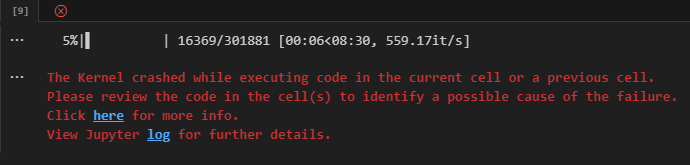

<b>Carga del dataset</b>

In [ ]:
#Cogemos la ruta donde se encuentra el csv en nuestro entorno local
filename = "./comentariosOdio.csv"
#filename = "F:/Master/Master en IA UNIR/Primer Cuatri/Actividades en Python/PLN/Actividades entregables/Actividad 1/comentariosOdio.csv"

lines_number = 350000

# Cargamos solo las columnas necesarias incluyendo "TIPO DE CONTENIDO", "INTENSIDAD" Y "TIPO DE MENSAJE"
data = pd.read_csv(
    filename,
    delimiter=';',
    encoding='utf-8',
    low_memory=False,
    usecols=['CONTENIDO A ANALIZAR', 'INTENSIDAD', 'TIPO DE MENSAJE'],
#    nrows=lines_number,
    encoding_errors='replace',
    dtype={'CONTENIDO A ANALIZAR': str, 'TIPO DE MENSAJE': str}
)

# Filtramos el dataset para quedarnos solo con filas donde "TIPO DE MENSAJE" contiene "COMENTARIO", ya que es el tipo de mensaje que queremos analizar
data = data[data["TIPO DE MENSAJE"].str.contains("COMENTARIO", na=False)]

# Al final solo dejamos las columnas "CONTENIDO A ANALIZAR" e "INTENSIDAD", que son las que nos servirán para hacer el codigo de las siguientes actividades
data = data[["CONTENIDO A ANALIZAR", "INTENSIDAD"]]

# Transformamos a numéricos los valores de intensidad
data["INTENSIDAD"] = pd.to_numeric(data["INTENSIDAD"], errors="coerce")

# Borramos las filas con valores NaN en cualquiera de las columnas
data = data.dropna(how='any')

# Borramos filas donde el contenido es igual pero la intensidad es diferente, quedandonos con el que tenga un valor mayor de intensidad de los duplicados
data = data.sort_values(by="INTENSIDAD", ascending=False)
data.drop_duplicates(subset="CONTENIDO A ANALIZAR", keep='first', inplace=True)

# Ordenamos los datos por índice
data = data.sort_index()

<b>Explicación limpiado del dataset original:</b>

Dado que los datos del dataset original (600 mil líneas) vienen sin un preprocesamiento previo o limpiado, vamos a hacer un pequeño limpiado una vez que lo cargamos para poder realizar mejor las actividades propuestas.

En este limpiado lo que se hace es lo siguiente:

1. Cargamos el csv seleccinando solo 3 columnas de todo el dataset (CONTENIDO A ANALIZAR, INTENSIDAD y TIPO DE MENSAJE), que son las que vamos a necesitar para realizar los ejercicios. Además, codificamos el texto con utf-8 y le asignamos el tipo string (str) a las columnas "CONTENIDO A ANALIZAR" y a "TIPO DE MENSAJE" para poder tratarlas correctamente.
2. Una vez cargado el dataset filtramos las filas del mismo, de tal manera que nos quedemos solo con las filas cuyo valor en la columna "TIPO DE MENSAJE" sea igual a "COMENTARIO", ya que nos interesa solo analizar los comentarios y no otro tipo de texto.
3. Una vez filtrado, ya nos podemos quedar con las dos únicas columnas que nos interesan de todo el dataset "CONTENIDO A ANALIZAR" e "INTENSIDAD".
4. Posteriormente transformaremos las filas de la columna "INTENSIDAD" en valores numéricos
5. Una vez hecho esto borraremos todas las filas que posean en algunas de las dos columnas un NaN, ya que la información estaría incompleta y no podríamos procesarlo de forma adecuada.
6. Una vez limpiado, ordenaremos el dataset por intensidad de formas descendiente y borraremos las filas que contengan en la columna "CONTENIDO A ANALIZAR" el mismo texto pero diferente "INTENSIDAD", de la cual nos quedaremos con la fila que tenga la mayor intensidad y borraremos las otras "duplicadas".
7. Finalmente ordenaremos los índices del dataset para una mejor lectura de mismo.

In [75]:
longitud_data_limpiado = len(data)
print(f"Longitud dataset limpiado: {longitud_data_limpiado}")

longitud_data_acotado = round(longitud_data_limpiado/2)
print(f"Longitud de la mitad del dataset limpiado: {longitud_data_acotado}")

data = data.sample(n=15000, random_state=42)
print(f"Longitud de una muestra aleatoria con una semilla del dataset limpiado: {len(data)} ")

Longitud dataset limpiado: 301881
Longitud de la mitad del dataset limpiado: 150940
Longitud de una muestra aleatoria con una semilla del dataset limpiado: 15000 


<b>Quedándonos con 15 mil líneas:</b>

Después de limpiar los datos, en la celda de código superior se puede ver la longitudad del dataset limpiado (301881 líneas), además muestro la longitud de la mitad del dataset (150940 líneas). Después de muchas pruebas tanto con el número de líneas del limpiado (300 mil aprox) y con la mitad del dataset (150 mil aprox) me seguía muriendo el kernel y ya como expliqué anteriormente, tras un ensayo de prueba y error el número de líneas donde no me moría el kernel era con 15 mil líneas. 

Entonces, una vez sabidas el número de líneas con las que no muere el kernel, en vez de coger los 15 mil primeros registros del dataset limpiado, he cogido una muestra aleatoria de tamaño de 15 mil líneas sobre este dataset de 300 mil y con una semilla para que cada vez que ejecute y cargue estas líneas me coja siempre las mismas líneas aleatorias. Con esto consigo tener unos datos más variados que aunque no sean el dataset limpiado completo, es posible que me de unos valores algo más aproximados a como los que debería de dar con todos los datos ya que al cogerlos aleatorios puede que estén los valores más distribuidos y se asemeje a la distribución del dataset limpiado. 

De esta manera ya tengo mi dataset acotado y limpiado y se puede comenzar a realizar las actividades.

El código anterior carga el archivo CSV (opcionalmente con un límite de líneas a leer) y genera la variable <i>data</i>, que contiene un Dataframe (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) con los datos leídos del CSV.

Te vendrá bien conocer la siguiente documentación:
<ul>
    <li>https://spacy.io/api/doc</li>
    <li>https://spacy.io/api/token</li>
    <li>https://spacy.io/api/morphology#morphanalysis</li>
</ul>

### Playground

Utiliza este espacio para hacer pruebas y ensayos con las variables generadas con el código previo. A modo de ejemplo, se ofrece código que realiza las siguientes tareas:


- leer un número dado de líneas del Dataframe y generar dos listas con los valores (se pueden leer directamente del DataFrame, se muestra el ejemplo como una opción más)
- procesar el texto de cada comentario


Para procesarlo, hay utilizar el objeto <i>nlp</i> y así obtener objetos de la clase <i>Doc</i> (https://spacy.io/api/doc)

Visita la documentación de dicha clase y experimenta probando las diferentes funciones y atributos

In [ ]:
# Puedes insertar aquí código de pruebas para experimentar con las diferentes funciones y atributos de 'doc'.
print(data["CONTENIDO A ANALIZAR"][1])
print(data["INTENSIDAD"][1])
doc = []
value = []

#con el bucle, generamos sendas listas con los comentarios ya parseados y con el valor de intensidad
for i in range(0, lines_number):

    #en un primer paso se parsea el comentario. En el segundo paso se añade el objeto a la lista
    tmp_doc = nlp(data["CONTENIDO A ANALIZAR"][i])
    doc.append(tmp_doc)

    #en un primer paso extrae el valor. En el segundo paso se añade el valor a la lista
    tmp_value = data["INTENSIDAD"][i]
    value.append(tmp_value)


#ejemplo de cómo recorrer un comentario palabra por palabra
for token in doc[1]:
    print(token)

el real madrid ha puesto punto y final a su andadura en la copa del rey en el primer escalón. los de zidane han caído ante el alcoyano, de segunda b, a pesar de empezar ganando y jugar con un hombre menos en la prórroga. el técnico francés dispuso un equipo plagado de los menos habituales, con vinicius y mariano en ataque. ninguno de los dos logró crear ocasiones. fue militao el que marcó el gol del madrid, justo antes del descanso. en la segunda parte intentaron cerrar el partido, pero sin el colmillo suficiente y el modesto alcoyano aprovechó un córner para empatar el partido a cinco minutos para el final. el empate sentó como un jarro de agua fría a los blancos, que lo intentaron en el tiempo extra a falta de cinco minutos, el casanova consiguió el gol más importante de su vida, que vale la clasificación para octavos de la copa. el madrid de zidane queda apeado del torneo una vez más, por lo que el francés se quedará sin pelear por el único título que no ha conseguido nunca. así hem

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 1.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántos registros contiene el corpus?</span>

In [5]:
# Incluye aquí el código generado para poder responder a tu pregunta
registros = len(data["CONTENIDO A ANALIZAR"])
registros

15000

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para calcular el número de registros que tiene el corpus, solo hay que sacar el número de filas del dataset, la cual se puede conocer con la funcion "len" a la que solo hay que pasarle el dataset o una columna del mismo, ya que todas las columnas del dataset poseen el mismo número de filas y evidentemente vemos que nos salen 15 mil líneas que es el número de líneas con el que acotamos el dataset anteriomente.


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 2.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántas palabras totales hay en los comentarios del corpus?</span>

In [ ]:
import tqdm.notebook
import multiprocessing

def num_palabras(text):
    tokens = nlp.make_doc(text)
    palabras = [token for token in tokens if token.is_alpha]
    return len(palabras)

# Desactivamos los recursos que no vayamos a utilizar
nlp = spacy.load("es_core_news_md", exclude=["ner", "morphologizer", "lemmatizer"])

#Utilizamos multiprocesamiento y vamos llamando a la funcion num_palabras para calcular texto por texto el numero de palabras de cada registro
with multiprocessing.Pool(processes=multiprocessing.cpu_count() - 1) as pool:
    num_words = list(tqdm.tqdm(pool.imap(num_palabras, data["CONTENIDO A ANALIZAR"]), total=data.shape[0]))

#Creamos una columna donde almacenamos el numero de palabras correspondiente a cada registro
data["num_words"] = num_words

num_words = sum(num_words)
num_words

100%|██████████| 15000/15000 [00:01<00:00, 11510.00it/s]


714796

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para contar cuantas palabras totales hay en el corpus lo que hay que hacer es ir fila por fila, es decir texto a texto, que son los que componen el corpus y de cada uno calcular el número de palabras y finalmente sumarlas todas. 

Para poder calcular esto se ha hecho lo siguiente:

1. Lo primero ha sido definir la función "num_palabras", la cual recibe como parametro un texto (una fila o celda de la columna "DATOS A ANALIZAR"), donde a este texto se le aplica la función nlp.make_doc para obtener únicamente los tokens del texto sin realizar ningún análisis adicional como sacar las NER, lemas, o funciones morfológicas (las cuales se anularon con la sentencia: "nlp = spacy.load("es_core_news_md", exclude=["ner", "morphologizer", "lemmatizer"])" antes de llamar a la función), de esta manera ahorramos recursos para calcular cosas que no nos harán falta de momento. Una vez obtenidos los tokens, se hará uso de la función is_alpha para ver al recorrer los tokens, cuales son alfabéticos y así quitar los espacios y signos de puntuación que no son palabras evidentemente. Despues de todo este proceso, se almacenará en un array las palabras alfabéticas, al que posteriormente se calculará la longitud, devolviendo así esta misma.

2. Una vez creada la función, se ha utilizado la librería de multiprocessing, que lo que hace es utilizar todos los nucleos disponibles de la CPU menos uno para asi no saturarla. Esta función me permite ejecutar funciones en paralelo sobre múltiples datos, haciendo así más eficiente la ejecución del código. Dado que como estoy ejecutándolo en WSL esta es una buena práctica ya que Linux tirá de la CPU directamente para ejecutar estos procesos mientras que en Windows trabaja de una forma diferente. Por otro lado, también se intentó utilizar la propia función de spacy de nlp.pipe() para poder analizar los textos de forma paralela pero no hacía ningún cambio significante y a veces me llegaba a saturar el ordenador o directamente daba error de kernel, por lo que opté por utilizar esta función de multiprocesamiento.

3. Además del multiprocesamiento, también se utilizó la librería tqdm para poder mostrar una barra de progreso mientras se ejecuta el código, para así tener nociones de como va ejecutándose o de si se queda pillado en algún punto.

4. Una vez hecho esto, dentro del multiprocesamiento y de la barra de progreso llamamos a la función definida posteriormente "num_palabras" aplicada a la columna "DATOS A ANALIZAR", la cual contiene los textos del corpus. Además, el resultado de analizar cada uno de los textos lo almacenaremos en forma de lista en una variable (num_words), la cual posteriormente se asignará a una nueva columna del dataset denominada "num_words", donde así por cada comentario o fila sabremos exáctamente el número de palabras que hay en ese texto.

5. Finalmente para mostrar el número total de palabras del corpus, sumamos la fila entera de "num_words", obteniendo así el número total de palabras del corpus.

Por último, como ya se ha comentado al principio de las actividades, al no coger el dataset limpiado al completo y solo haber cogido una pequeña muestra no son muy fiables los datos obtenidos, sin embargo, para esta muestra podemos observar como el número de palabras totales en este corpus limpiado de 15 mil líneas es de 714796 palabras.


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 3.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál el número promedio de palabras en cada comentario?</span>

In [78]:
# Incluye aquí el código generado para poder responder a tu pregunta
promedio_palabras = float(data["num_words"].mean())
print(f"El promedio de palabras en comentarios es: {promedio_palabras:.2f} palabras".replace('.', ','))

El promedio de palabras en comentarios es: 47,65 palabras


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Como creamos en el apartado anterior una nueva fila en el dataset denominada "num_words", la cual contiene el numero de palabras de cada texto en su fila correspondiente, para poder obtener el número medio de palabras de comentarios, solo hay que coger esta columna entera y aplicarle la función de la media (.mean()).

Por último, como ya se ha comentado al principio y en cada una de las actividades, al no coger el dataset limpiado al completo y solo haber cogido una pequeña muestra no son muy fiables los datos obtenidos, sin embargo, para esta muestra podemos observar como el promedio de palabras en los comentarios es de 47,65 palabras.


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 4.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál el número promedio de palabras en los comentarios de cada grupo?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta

# Dividimos el conjunto de datos en dos grupos: odio y no odio
data_odio = data[data["INTENSIDAD"] > 0]
data_NO_odio = data[data["INTENSIDAD"] == 0]

# Calculamos el promedio de palabras para cada grupo
promedio_palabras_odio = data_odio["num_words"].mean()
print(f"El promedio de palabras en comentarios de odio es: {promedio_palabras_odio:.2f} palabras".replace('.', ','))

promedio_palabras_NO_odio = data_NO_odio["num_words"].mean()
print(f"El promedio de palabras en comentarios de NO odio es: {promedio_palabras_NO_odio:.2f} palabras".replace('.', ','))


El promedio de palabras en comentarios de odio es: 14,84 palabras
El promedio de palabras en comentarios de NO odio es: 48,77 palabras


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Al igual que en el apartado anterior al tener ya el numero de palabras en cada fila, gracias a la creación de la columna "num_words" en el dataset, lo único que hay que hacer en este caso es dividir el dataset según la intensidad: odio (intensidad > 0) y no odio (intensidad == 0). Una vez divididos, se hará lo mismo que en el ejercicio anterior, para cada dataset filtrado (odio y no odio), se aplicará según la columa "num_words" la función ".mean()", para así calcular el número medio de palabras para cada grupo.

Por último, como ya se ha comentado al principio y en cada una de las actividades, al no coger el dataset limpiado al completo y solo haber cogido una pequeña muestra no son muy fiables los datos obtenidos, sin embargo, para esta muestra podemos observar como el número promedio de palabras es notablemente menor en los comentarios con odio que en los de NO odio, concluyendo así que en un comentario con odio se escriben muchas menos palabras y por tanto los hace más cortos que los comentarios sin odio.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 5.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el número promedio de oraciones en los comentarios de cada grupo?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta

#Desactivamos los recursos que no vayamos a utilizar
nlp = spacy.load("es_core_news_md", exclude=["ner","morphologizer","lemmatizer"])

#Hacemos una funcion donde obtenemos el numero de oraciones por cada texto/registro/fila
def num_oraciones(texto):
    doc = nlp(texto)
    return len(list(doc.sents))

#Aplicamos multiprocesamiento, la barra de progreso y la función num_oraciones para cada texto del dataset
with multiprocessing.Pool(processes=multiprocessing.cpu_count() - 1) as pool:
    data["num_sentences"] = list(tqdm.tqdm(pool.imap(num_oraciones, data["CONTENIDO A ANALIZAR"]), total=data.shape[0]))

#Separamos nuestro dataset en ODIO Y NO ODIO
data_odio = data[data["INTENSIDAD"] > 0]
data_NO_odio = data[data["INTENSIDAD"] == 0]

#Calculamos el promedio de oraciones de cada tipo
promedio_oraciones_odio = data_odio["num_sentences"].mean()
print(f"El promedio de oraciones en comentarios de odio es: {promedio_oraciones_odio:.2f} oraciones".replace('.', ','))

promedio_oraciones_NO_odio = data_NO_odio["num_sentences"].mean()
print(f"El promedio de oraciones en comentarios de NO odio es: {promedio_oraciones_NO_odio:.2f} oraciones ".replace('.', ','))

100%|██████████| 15000/15000 [00:04<00:00, 3087.94it/s]

El promedio de oraciones en comentarios de odio es: 1,47 oraciones
El promedio de oraciones en comentarios de NO odio es: 2,33 oraciones 


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para calcular el número promedio de sentencias u oraciones en los comentarios de cada grupo (odio y no odio) se han realizado los siguientes:

1. Lo primero desactivamos las funciones de nlp que no vayamos a utilzar para esta actividad, de esta forma podremos ahorrar recursos. En este caso volvemos a excluir la funcion "NER", morfológica y el lematizador.

2. A continuación definimos nuestra función "num_oraciones", la cual recibirá como parámetro de entrada un texto, donde le aplicaremos la función nlp para así poder sacar el "doc" que contiene los tokens, sentencias, etc. Una vez sacado el doc, cogeremos del mismo las sentencias con ayuda de ".sent", las cuales las meteremos en una lista y le calcularemos la longitud de la lista, obteniendo así el número de sentencias para ese texto.

3. Una vez calculada la función, llamaremos a la función de multiprocesamiento, la barra de progreso y llamaremos a la función "num_oraciones" a la que le pasaremos uno por uno los textos de la columna "CONTENIDO A ANALIZAR". El resultado de la función se devolverá en formato de lista con el número de oraciones de cada uno de los textos y se meterá su valor en una nueva columna en el dataset, denominada "num_sentences".

4. Una vez obtenida la nueva columna del dataset "num_sentences", para calcular el numero medio de oraciones para cada grupo (odio y no odio) se dividirá el dataset, como se hizo en actividades anteriores, en los dos grupos y luego dentro de cada grupo se cogerá únicamente la columna de "num_sentences" y se le aplicará la función de ".mean()", obteniendo así el número medio de sentencias para cada grupo.

Por último, como ya se ha comentado al principio y en cada una de las actividades, al no coger el dataset limpiado al completo y solo haber cogido una pequeña muestra no son muy fiables los datos obtenidos, sin embargo, para esta muestra podemos observar como el número promedio de oraciones es menor en los comentarios con odio que en los que NO tienen odio, por tanto podemos concluir que los comentarios con odio son considerablemente más cortos que los comentarios sin odio.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 6.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER en cada grupo?</span>

In [10]:
# Incluye aquí el código generado para poder responder a tu pregunta

#Desactivamos los recursos que no vayamos a utilizar
nlp = spacy.load("es_core_news_md", exclude=["morphologizer","lemmatizer"])

#Definimos la funcion para ver si en un texto hay entidades NER o no
def hay_NER(texto):
    doc = nlp(texto)
    return min(1, len(doc.ents))

#Aplicamos multiprocesamiento, la barra de progreso y la función num_oraciones para cada texto del dataset
with multiprocessing.Pool(processes=multiprocessing.cpu_count() - 1) as pool:
    data["hay_NER_registros"] = list(tqdm.tqdm(pool.imap(hay_NER, data["CONTENIDO A ANALIZAR"]), total=data.shape[0]))

#Separamos nuestro dataset en ODIO Y NO ODIO
data_odio = data[data["INTENSIDAD"] > 0]
data_NO_odio = data[data["INTENSIDAD"] == 0]

#Calculamos el numero de NER que hay con ODIO y sin ODIO
num_NER_odio = data_odio["hay_NER_registros"].sum()
num_NER_NO_odio = data_NO_odio["hay_NER_registros"].sum()

#Calculamos  los porcentaje de odio y NO odio
porcentaje_odio = (num_NER_odio/len(data_odio)) * 100
print(f"El porcentaje de comentarios de odio que contienen NER es: {porcentaje_odio:.2f} %".replace('.', ','))

porcentaje_NO_odio = (num_NER_NO_odio/len(data_NO_odio)) * 100
print(f"El porcentaje de comentarios de NO odio que contienen NER es: {porcentaje_NO_odio:.2f} %".replace('.', ','))

100%|██████████| 15000/15000 [00:08<00:00, 1759.57it/s]

El porcentaje de comentarios de odio que contienen NER es: 38,06 %
El porcentaje de comentarios de NO odio que contienen NER es: 48,72 %


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para calcular el porcentaje de entidades NER en los comentarios de cada grupo (odio y no odio) se han realizado los siguientes:

1. Lo primero desactivamos las funciones de nlp que no vayamos a utilzar para esta actividad, de esta forma podremos ahorrar recursos. En este caso excluiremos la funcion morfológica y el lematizador.

2. A continuación definimos nuestra función "hay_NER", la cual recibirá como parámetro de entrada un texto, donde le aplicaremos la función nlp para así poder sacar el "doc" que contiene los tokens, sentencias, NER, etc. Una vez sacado el doc, cogeremos del mismo las entidades con ayuda de ".ent" y le calcularemos la longitud de esta lista de entidades, de esta forma, aplicando la función "min", si en la lista de entidades hay más de una, la función devolverá 1 (indicando que SI hay entidades en ese texto), en cambio si de esta lista el resultado es cero, la función devolverá 0 (indicando que NO hay ninguna entidad en ese texto).

3. Una vez calculada la función, llamaremos a la función de multiprocesamiento, la barra de progreso y llamaremos a la función "hay_NER" a la que le pasaremos uno por uno los textos de la columna "CONTENIDO A ANALIZAR". El resultado de la función se devolverá en formato de lista que contendrá por cada celda un 1 o un 0, indicándo si hay o no entidades en cada texto. Este a su vez, se meterá en una nueva columna en el dataset, denominada "hay_NER_registros".

4. Una vez obtenida la nueva columna del dataset "hay_NER_registros", para calcular el porcentaje de NER para cada grupo (odio y no odio) se dividirá el dataset, como se hizo en actividades anteriores, en los dos grupos y luego dentro de cada grupo se cogerá únicamente la columna de "hay_NER_registros" y se le aplicará la función de ".sum()", obteniendo así el número total de NER para cada grupo. Una vez obtenida la suma total de cada grupo, se dividirán estos valores por el número total de registros de cada grupo y posteriormente multiplicados por 100, de esta manera obtendríamos los tanto por ciento de NER para cada grupo.

Por último, como ya se ha comentado al principio y en cada una de las actividades, al no coger el dataset limpiado al completo y solo haber cogido una pequeña muestra no son muy fiables los datos obtenidos, sin embargo, para esta muestra podemos observar como los comentarios sin odio poseen un mayor tanto por ciento de entidades NER en relación a los comentarios con odio, siendo una diferencia un tanto notable.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 7.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER de tipo PERSON en cada grupo?</span>

In [11]:
# Incluye aquí el código generado para poder responder a tu pregunta

#Definimos la funcion para ver si en un texto hay entidades NER o no de tipo PERSON
def hay_NER_PER(texto):
    doc = nlp(texto)
    for entidad in doc.ents:
        if entidad.label_ == "PER":
            return 1
    return 0

#Aplicamos multiprocesamiento, la barra de progreso y la función num_oraciones para cada texto del dataset
with multiprocessing.Pool(processes=multiprocessing.cpu_count() - 1) as pool:
    hay_NER_PER_registros = list(tqdm.tqdm(pool.imap(hay_NER_PER, data["CONTENIDO A ANALIZAR"]), total=data.shape[0]))

#Creamos una columna donde almacenamos el numero de oraciones correspondiente a cada registro
data["hay_NER_PER_registros"] = hay_NER_PER_registros

#Separamos nuestro dataset en ODIO Y NO ODIO
data_odio = data[data["INTENSIDAD"] > 0]
data_NO_odio = data[data["INTENSIDAD"] == 0]

#Calculamos el numero de NER con PER que hay con ODIO y sin ODIO
num_NER_odio = data_odio["hay_NER_PER_registros"].sum()
num_NER_NO_odio = data_NO_odio["hay_NER_PER_registros"].sum()

#Calculamos  los porcentaje de odio y NO odio
porcentaje_PER_odio = (num_NER_odio/len(data_odio)) * 100
print(f"El porcentaje de comentarios de odio que contienen NER es: {porcentaje_PER_odio:.2f} %".replace('.', ','))

porcentaje_PER_NO_odio = (num_NER_NO_odio/len(data_NO_odio)) * 100
print(f"El porcentaje de comentarios de NO odio que contienen NER es: {porcentaje_PER_NO_odio:.2f} %".replace('.', ','))

100%|██████████| 15000/15000 [00:08<00:00, 1717.73it/s]


El porcentaje de comentarios de odio que contienen NER es: 16,40 %
El porcentaje de comentarios de NO odio que contienen NER es: 21,34 %


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Esta actividad se haría exactamente igual que la actividad anterior, lo único en lo que cambian sería en la definición de la función, en este caso sería "hay_NER_PER". En esta, una vez extraído el "doc" del texto pasado por parámetro, recorrerá cada una de las entidades de las listas entidades extraídas de la función "doc.ents" para ese texto, y en el caso de que haya alguna de tipo "PER" que se corresponde con el tipo "person" o "persona"la función devolverá directamente un 1, y en el caso de que recorra todas las entidades de ese texto y no haya encontrado ninguna devolverá un 0. Posteriormente esta lista de ceros y unos se guardará en otra nueva columna del dataset, al igual que en el ejercicio anterior, denominada "hay_NER_PER_registros", donde luego se seguirán los mismos pasos hechos en el ejercicio anterior para calcular el tanto por ciento. 

Por último, como ya se ha comentado al principio y en cada una de las actividades, al no coger el dataset limpiado al completo y solo haber cogido una pequeña muestra no son muy fiables los datos obtenidos, sin embargo, para esta muestra podemos observar como el tanto por ciento de comentarios que contienen NER de tipo PERSON es mayor en los comentarios sin odio que los que si tienen odio.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 8.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de palabras en cada combinación posible de género y número (p.ej. masculino singular) en cada grupo?</span>

In [12]:
# Incluye aquí el código generado para poder responder a tu pregunta

# Desactivamos los recursos que no vayamos a utilizar
nlp = spacy.load("es_core_news_md", exclude=["ner", "lemmatizer"])

# Filtramos los datos en los dos grupos
data_odio = data[data["INTENSIDAD"] > 0]["CONTENIDO A ANALIZAR"].tolist()
data_NO_odio = data[data["INTENSIDAD"] == 0]["CONTENIDO A ANALIZAR"].tolist()

# Función para contar palabras según género y número dado un texto
def contar_genero_numero(textos):
    conteos_globales = {"masculino_singular": 0, "masculino_plural": 0,
                        "femenino_singular": 0, "femenino_plural": 0}
    total_palabras = 0

    for texto in textos:
        doc = nlp(texto)
        for token in doc:
            genero = token.morph.get("Gender")
            numero = token.morph.get("Number")
            if genero and numero:  # Si la palabra tiene género y número
                clave = None
                if genero[0] == "Masc" and numero[0] == "Sing":
                    clave = "masculino_singular"
                elif genero[0] == "Masc" and numero[0] == "Plur":
                    clave = "masculino_plural"
                elif genero[0] == "Fem" and numero[0] == "Sing":
                    clave = "femenino_singular"
                elif genero[0] == "Fem" and numero[0] == "Plur":
                    clave = "femenino_plural"

                if clave:
                    conteos_globales[clave] += 1
                    total_palabras += 1  # Incrementar el total de palabras analizadas

    return conteos_globales, total_palabras

# Función para calcular los porcentajes
def calcular_porcentajes(conteos, total_palabras):
    if total_palabras == 0:
        return {clave: 0 for clave in conteos}  # Evitar división por cero
    return {clave: (conteos[clave] / total_palabras) * 100 for clave in conteos}

# Calculamos los conteos y porcentajes para cada grupo con multiprocessing
with multiprocessing.Pool(processes=multiprocessing.cpu_count() - 1) as pool:
    conteos_odio, total_palabras_odio = pool.apply(contar_genero_numero, [data_odio])
    conteos_NO_odio, total_palabras_NO_odio = pool.apply(contar_genero_numero, [data_NO_odio])

# Calculamos los porcentajes para cada grupo
porcentajes_odio = calcular_porcentajes(conteos_odio, total_palabras_odio)
porcentajes_NO_odio = calcular_porcentajes(conteos_NO_odio, total_palabras_NO_odio)

# Mostramos los resultados
print("Porcentajes de género y número en comentarios de odio:")
for clave, porcentaje in porcentajes_odio.items():
    print(f"{clave.replace('_', ' ').capitalize()}: {porcentaje:.2f} %".replace('.', ','))

print("\nPorcentajes de género y número en comentarios de NO odio:")
for clave, porcentaje in porcentajes_NO_odio.items():
    print(f"{clave.replace('_', ' ').capitalize()}: {porcentaje:.2f} %".replace('.', ','))


Porcentajes de género y número en comentarios de odio:
Masculino singular: 39,52 %
Masculino plural: 17,53 %
Femenino singular: 34,85 %
Femenino plural: 8,10 %

Porcentajes de género y número en comentarios de NO odio:
Masculino singular: 41,00 %
Masculino plural: 15,97 %
Femenino singular: 32,43 %
Femenino plural: 10,60 %


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para calcular el tanto por ciento de palabras en su combinación posible de género y número se han seguido los siguientes pasos:

1. En primer luegar desactivamos los recursos que no vayamos a utilizar para la función "nlp", en este caso desactivaremos: "ner" y el lematizador.

2. A continuación filtramos los datos para ambos grupos, dividiendo el dataset en odio y no odio, cogiendo únicamente la columna de "DATOS A ANALIZAR" y transformando estos dataset en una lista para su mejor procesamiento.

3. Creamos la función "contar_genero_numero" a la cual se le pasará un array de la lista de textos de cada grupo extraídos en el paso anterior, a esta se le denominará "textos". Dentro de esta función crearemos un diccionario donde las claves se correspoderán con las posibles combinaciones de género y número (en este caso hay 4) y los valores se inicializará a cero, además, se creará un contador con el número total de palabras que luego utilizaremos más adelante. Una vez creadas cada una de las variables que nos hace falta, crearemos un bucle for donde del array de textos de cada uno de los grupos iremos recorriendo uno a uno, donde de forma independiente se le aplicará la función "nlp", extrayendo el "doc correspondiente". Una vez extraido, para cada uno de los tokens que haya en "doc" se le sacará su género y número a través de la función ".morph.get()". Una vez sacados se verá si la palabra contiene genero y numero, donde en caso afirmativo comprobaremos si se refiere a uno de los tipos que tenemos como clave. En el caso de que si exista se sumará uno en el diccionario con todas las combinaciones a la clave correspondiente y también uno al número total de palabras de ese grupo. De esta forma recogeremos el número de palabras para cada tipo dentro del diccionario y su número total de palabras para cada uno de los textos de cada grupo.

4. Una vez que hemos recogido el conteo y el número total de palabras para cada grupo llamamos a la función "calcular_porcentajes", a la cual le pasamos por parámetro estos conteos y el número total de palabras de cada grupo. Dentro de esta función recorrera el diccionario en cuestión (conteos) y lo dividirá cada valor de cada clave entre el número total de palabras y luego se multiplicará por 100, hayando así los porcentajes para cada combinación de género y número.

Por último, como ya se ha comentado al principio y en cada una de las actividades, al no coger el dataset limpiado al completo y solo haber cogido una pequeña muestra no son muy fiables los datos obtenidos, sin embargo, para esta muestra podemos observar como en ambos grupos el porcentaje de palabras más usado es masculino singular, seguido del femenino singular.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 9.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), indica cuántas entidades de cada tipo posible se reconocen en cada uno de los grupos</span>

In [13]:
# Incluye aquí el código generado para poder responder a tu pregunta

#Desactivamos los recursos que no vayamos a utilizar
nlp = spacy.load("es_core_news_md", exclude=["morphologizer","lemmatizer"])

# Filtramos los datos en los dos grupos
data_odio = data[data["INTENSIDAD"] > 0]
data_NO_odio = data[data["INTENSIDAD"] == 0]

# Función para contar entidades por tipo
def contar_entidades(texto):
    doc = nlp(texto)
    conteo = {}
    for entidad in doc.ents:
        tipo = entidad.label_  # Tipo de la entidad
        if tipo not in conteo:
            conteo[tipo] = 0
        conteo[tipo] += 1
    return conteo

# Función para sumar conteos en un grupo
def sumar_conteos(data):
    conteos_globales = {}
    with multiprocessing.Pool(processes=multiprocessing.cpu_count() - 1) as pool:
        # Procesamos todos los textos en paralelo con multiprocessing y la barra de progreso
        conteos_textos = list(tqdm.tqdm(pool.imap(contar_entidades, data["CONTENIDO A ANALIZAR"]), total=data.shape[0]))

    # Consolidamos los conteos de cada texto en un único diccionario global
    for conteo_texto in conteos_textos:
        for tipo, cantidad in conteo_texto.items():
            if tipo not in conteos_globales:
                conteos_globales[tipo] = 0
            conteos_globales[tipo] += cantidad

    return conteos_globales

# Calculamos conteos para cada grupo
conteos_odio = sumar_conteos(data_odio)
conteos_NO_odio = sumar_conteos(data_NO_odio)

# Mostramos resultados
print("Número de entidades en comentarios de odio:")
for tipo, cantidad in conteos_odio.items():
    print(f"{tipo}: {cantidad}")

print("\nNúmero de entidades en comentarios de NO odio:")
for tipo, cantidad in conteos_NO_odio.items():
    print(f"{tipo}: {cantidad}")

100%|██████████| 14506/14506 [00:08<00:00, 1778.45it/s]


Número de entidades en comentarios de odio:
MISC: 48
PER: 96
LOC: 62
ORG: 41

Número de entidades en comentarios de NO odio:
LOC: 8502
MISC: 2689
PER: 7071
ORG: 2808


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para calcular el numero de entidades que se reconocen en cada grupo se han seguido los siguientes pasos:

1. En primer luegar desactivamos los recursos que no vayamos a utilizar para la función "nlp", en este caso desactivaremos: la función morfológica y el lematizador.

2. A continuación filtramos los datos para ambos grupos, dividiendo el dataset en odio y no odio.

3. Creamos la función "contar_entidades" a la cual se le pasará un texto o registro del dataset. A este texto le aplicaremos la función "nlp" para obtener el "doc", además nos crearemos una variable de tipo diccionario denominada "conteo", la cual almacenará cada uno de los tipos de entidades que vaya encontrando y el número de veces que aparece. En primer lugar sacaremos las entidades utilizando "doc.ents" y para cada una de las entidades le sacaremos la etiqueta de la propia entidad con ".label_", en el caso de que esta etiqueta no se encuentre en el diccionario "conteo" se añadirá a este con valor de cero y una vez que si se encontrase se incrementaría en uno el valor.

4. Una vez procesado cada texto de cada grupo y haber sacados sus respectivos conteos de las entidades, dentro de la función "sumar_conteos", recorre cada uno de los conteos para cada texto del grupo en cuestión y desglosamos el diccionario sacando su clave y valor, donde realizaremos algo similar a la función anterior, donde, si en el diccionario global, "conteos_global" no se encuentra esa clave, se añadirá esta al mismo y con valor de cero, una vez comprobado y sabiendo que existe la clave, se le sumará el valor correspondiente de esta clave a la clave del diccionario global. De esta manera habremos calculado el numero de las diferentes entidades para cada uno de los grupos.

Por último, como ya se ha comentado al principio y en cada una de las actividades, al no coger el dataset limpiado al completo y solo haber cogido una pequeña muestra no son muy fiables los datos obtenidos, sin embargo, para esta muestra podemos observar como hemos encontrado 4 tipo de entidades en los comentarios: LOC (localización), MISC (miscaláneas), PER (entidades o nombres de personas) y ORG (nombre de organizaciones). Dentro de las cifras obtenidas podemos destacar como en los comentarios con odio existe un mayor número de entidades de tipo persona, mientras que en los comentarios sin odio, las más nombradas son localizaciones. Además cabe destacar la gran diferencia de frecuencia entre un tipo de comentario y otro en las diferentes categorías de entidades.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 10.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), extrae y muestra los 100 lemas más repetidos en los comentarios de cada grupo</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta

#Desactivamos los recursos que no vayamos a utilizar
nlp = spacy.load("es_core_news_md", exclude=["ner"])

# Filtramos los datos en los dos grupos
data_odio = data[data["INTENSIDAD"] > 0]
data_NO_odio = data[data["INTENSIDAD"] == 0]

# Función para contar lemas
def contar_lemas(texto):
    doc = nlp(texto)
    conteo = {}
    for token in doc:
        # Nos quedamos con las palabras alfabeticas e ignoramos stop words
        if token.is_alpha and not token.is_stop:
            lema = token.lemma_
            if lema not in conteo:
                conteo[lema] = 0
            conteo[lema] += 1
    return conteo

# Función para sumar conteos en un grupo
def sumar_conteos(data):
    conteos_globales = {}

    # Procesamos todos los textos en paralelo con multiprocessing y la barra de progreso
    with multiprocessing.Pool(processes=multiprocessing.cpu_count() - 1) as pool:
        conteos_textos = list(tqdm.tqdm(pool.imap(contar_lemas, data["CONTENIDO A ANALIZAR"]), total=data.shape[0]))

    # Agrupamos los resultados de conteos individuales
    for conteo_texto in conteos_textos:
        for lema, cantidad in conteo_texto.items():
            if lema not in conteos_globales:
                conteos_globales[lema] = 0
            conteos_globales[lema] += cantidad

    return conteos_globales

# Calculamos conteos para cada grupo y los ordenamos
conteos_odio = dict(sorted(sumar_conteos(data_odio).items(), key=lambda x: x[1], reverse=True))
conteos_NO_odio = dict(sorted(sumar_conteos(data_NO_odio).items(), key=lambda x: x[1], reverse=True))

# Obtenemos los 100 lemas más frecuentes
top_100_odio = dict(list(conteos_odio.items())[:100])
top_100_NO_odio = dict(list(conteos_NO_odio.items())[:100])

# Mostramos los resultados
print("Diccionario ordenado de odio (top 100):", top_100_odio)
print("\n")  # salto de linea
print("Diccionario ordenado de NO odio (top 100):", top_100_NO_odio)

100%|██████████| 14506/14506 [00:06<00:00, 2283.10it/s]

Diccionario ordenado de odio (top 100): {'puta': 37, 'asco': 27, 'gobierno': 24, 'españa': 23, 'mierda': 21, 'español': 20, 'gente': 18, 'vergüenza': 17, 'mentiroso': 16, 'panfleto': 15, 'gentuza': 15, 'hijo': 15, 'ver': 14, 'basura': 14, 'pasar': 14, 'idiota': 14, 'país': 14, 'tener': 14, 'miserable': 13, 'madre': 13, 'inútil': 13, 'creer': 12, 'dejar': 12, 'político': 11, 'menudo': 11, 'morir': 10, 'seguir': 10, 'facha': 10, 'sinvergüenza': 9, 'asqueroso': 9, 'tío': 9, 'q': 9, 'pagar': 9, 'culpa': 8, 'puto': 8, 'hdp': 8, 'dar': 8, 'mundo': 8, 'tomar': 8, 'esperar': 8, 'periodista': 8, 'partido': 8, 'cosa': 8, 'panda': 8, 'dais': 8, 'estupidez': 7, 'tonto': 7, 'pobre': 7, 'trump': 7, 'traidor': 7, 'familia': 7, 'vivir': 7, 'tipo': 7, 'psicópata': 7, 'cárcel': 7, 'sinvergüenzas': 6, 'pandemia': 6, 'vacunar': 6, 'ilegal': 6, 'loco': 6, 'vox': 6, 'fascista': 6, 'terrorista': 6, 'acabar': 6, 'mentira': 6, 'decir': 6, 'ser': 6, 'dinero': 6, 'votar': 6, 'psoe': 6, 'malo': 6, 'hp': 6, 'salir

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para calcular los 100 lemas más repetidos en cada uno de los grupos en los comentarios se han seguido los siguientes pasos:

1. En primer luegar desactivamos los recursos que no vayamos a utilizar para la función "nlp", en este caso desactivaremos: "ner".

2. A continuación filtramos los datos para ambos grupos, dividiendo el dataset en odio y no odio. Para este ejercicio se crearán dos funciones muy similares al anterior ejercicio.

3. Creamos la función "contar_lemas" a la cual se le pasará un texto o registro del dataset. A este texto le aplicaremos la función "nlp" para obtener el "doc", además nos crearemos una variable de tipo diccionario denominada "conteo", la cual almacenará cada uno de los lemas que vaya encontrando y el número de veces que aparece. A continuación, recorreremos cada uno de los diferentes tokens, donde comprobaremos mediante la función "is_alpha" si es una palabra alfabética, evitando así contar espacios y signos de puntuación, además comprobaremos también que no sea una stop word, aplicando la función "is_stop". Una vez comprobado, extraeremos de ese token su lema con la función ".lemma_", una vez obtenido haremos lo mismo que en el ejercicio anterior, comprobaremos si en el diccionario "conteo" se encuentra ese lema, donde en caso negativo se añadirá esta pero con un valor de cero, una vez que tenemos el lema en el diccionario, se incrementará el valor de este lema como clave en "conteo" en uno.

4. Una vez procesado cada texto de cada grupo y haber sacados sus respectivos conteos de los lemas, dentro de la función "sumar_conteos", recorre cada uno de los conteos para cada texto del grupo en cuestión y desglosamos el diccionario sacando su clave y valor, donde realizaremos algo similar a la función anterior, donde, si en el diccionario global, "conteos_global" no se encuentra esa clave, se añadirá esta al mismo y con valor de cero, una vez que se encuentra ya en el conteo global la clave, se le sumará el valor correspondiente de esta clave a la clave del diccionario global.

5. Una vez que tenemos ya los conteos definitivos de cada grupo convertimos estos diccionarios en una lista de tuplas mediante la función ".items()", donde después con la función "sorted()" serán ordenadas de manera descendiente. Finalmente volveremos a convertir esta lista de tuplas en un diccionario para poder visualizarlo mejor, con ayuda de la función "dict()". De esta manera obtendremos para cada grupo (odio y no odio) un diccionario con los 100 lemas más repetidos en los comentarios.

Por último, como ya se comentó en el inicio y en cada una de las actividades, al no coger el dataset limpiado al completo y solo haber cogido una pequeña muestra no son muy fiables los datos obtenidos, sin embargo, para esta muestra podemos observar como los primeros lemas de los 100 más repetidos de cada grupo poseen una gran diferencia en cuento a la frecuencia en la que aparecen estas palabras, esto es debido seguramente a que los comentarios de odio emplean comentarios muchos más cortos que los de NO odio, además en esta muestra se podría entender que existen muchos más comentarios sin odio que a la viceversa. Además, se puede ver como los comentarios de odio se componen en su mayoría de palabras grotescas y malsonantes que los de sin odio.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 11.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Es posible utilizar alguna de las características extraídas en las preguntas anteriores para determinar si un mensaje contiene odio? Justifica tu respuesta con el análisis estadístico que consideres necesario.</span>

<b></b>
En este apartado llevaremos a cabo diferentes métodos para conocer según las técnicas y resultados aplicados en esta actividad cuando un mensaje contiene odio o no.


In [67]:
# Incluye aquí el código generado para poder responder a tu pregunta

from scipy.stats import ttest_ind

# Comparamos el número promedio de palabras entre los dos grupos
odio_palabras = data[data["INTENSIDAD"] > 0]["num_words"]
no_odio_palabras = data[data["INTENSIDAD"] == 0]["num_words"]

# Realizamos el t-test
t_stat, p_value = ttest_ind(odio_palabras, no_odio_palabras, equal_var=False)

# Mostramos los resultados que nos dio anteriomente y los del t-test
print(f"El promedio de palabras en comentarios de odio es: {promedio_palabras_odio:.2f} palabras".replace('.', ','))
print(f"El promedio de palabras en comentarios de NO odio es: {promedio_palabras_NO_odio:.2f} palabras".replace('.', ','))
print(f"El valor T-Statistic: {t_stat:.4f}")
print(f"El valor P-Value: {p_value:.4e}")

# Interpretación de los resultados
if p_value < 0.05:
    print("La diferencia en el número promedio de palabras es estadísticamente significativa.")
else:
    print("No hay una diferencia significativa en el número promedio de palabras entre los grupos.")

El promedio de palabras en comentarios de odio es: 14,84 palabras
El promedio de palabras en comentarios de NO odio es: 48,77 palabras
El valor T-Statistic: -27.3658
El valor P-Value: 1.7564e-147
La diferencia en el número promedio de palabras es estadísticamente significativa.


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para conocer si un mensaje contiene odio o no, podemos fijarnos en diferentes características que tienen estos texto, como por ejemplo: el numero de palabras entre los grupos, el numero de oraciones, las proporciones de NER, ya sea en general o de tipo PERSON. Para estos casos se han utilizado el análisis estadístico T-test Student para poder ver si existen diferencias estadísticas significativas entre ambos grupos.

Para poner un poco de contexto vamos a explicar de manera breve en que consiste un T-test de Student:

El T-test de Student es una prueba estadística utilizada para determinar si hay una diferencia significativa entre las medias de dos grupos.
Los pasos que se siguen cuando se aplica dicha técnica son los siguientes:

1. Plantear la hipótesis nula (H₀): Generalmente, afirma que no hay diferencia entre las medias de los dos grupos.
2. Plantear la hipótesis alternativa (H₁): La hipótesis alternativa afirma que hay una diferencia significativa entre las medias de los dos grupos (en este caso esta no se usa, usamos solo la hipótesis nula).
3. Se calcula el valor T-Statistic
4. Obtener el valor p: es la probabilidad de observar un valor t tan extremo como el calculado si la hipótesis nula es cierta. 

    -Si el valor p es menor que el nivel de significancia (generalmente suele valer 0.05), rechazamos la hipótesis nula y se dice que hay diferencias significativas.
    
    -Si el valor p es mayor o igual que el nivel de significancia (generalmente suele valer 0.05), no se podría confirmar que existan diferencias significativas.

Para este caso, que sería el numero promedio de palabras para cada grupo, su interpretación sería:

- <b>T-Statistic:</b> El valor t de -27.3658 indica la magnitud de la diferencia entre los dos grupos (comentarios de odio y comentarios de no odio) en términos de desviaciones estándar. Este valor negativo simplemente refleja la dirección de la diferencia (en este caso, los comentarios de odio tienen un número promedio de palabras más bajo que los de no odio). Por lo que, un valor t tan grande (en valor absoluto) generalmente sugiere que la diferencia entre los grupos es bastante pronunciada.

- <b>P-Value:</b> El valor p de 1.7564e-147 es extremadamente pequeño. Esto significa que hay una probabilidad casi nula de que la diferencia observada entre los grupos haya ocurrido por azar. De hecho, el valor p es tan bajo que es mucho menor que el umbral de significancia común de 0.05. Por tanto, un valor p tan bajo indica una diferencia estadísticamente significativa.

Con eso podemos determinar que generalmente cuando se escribe un comentario con odio se escriben muchas menos palabras que cuando se escribe un comentario sin odio.

In [68]:
# Comparamos el número promedio de oraciones entre los dos grupos
odio_oraciones = data[data["INTENSIDAD"] > 0]["num_sentences"]
no_odio_oraciones = data[data["INTENSIDAD"] == 0]["num_sentences"]

# Realizamos el t-test
t_stat, p_value = ttest_ind(odio_oraciones, no_odio_oraciones, equal_var=False)

# Mostramos los resultados que nos dio anteriomente y los del t-test
print(f"El promedio de oraciones en comentarios de odio es: {promedio_oraciones_odio:.2f} oraciones".replace('.', ','))
print(f"El promedio de oraciones en comentarios de NO odio es: {promedio_oraciones_NO_odio:.2f} oraciones".replace('.', ','))
print(f"El valor T-Statistic: {t_stat:.4f}")
print(f"El valor P-Value: {p_value:.4e}")

# Interpretación de los resultados
if p_value < 0.05:
    print("La diferencia en el número promedio de oraciones es estadísticamente significativa.")
else:
    print("No hay una diferencia significativa en el número promedio de oraciones entre los grupos.")


El promedio de oraciones en comentarios de odio es: 1,47 oraciones
El promedio de oraciones en comentarios de NO odio es: 2,33 oraciones
El valor T-Statistic: -16.9753
El valor P-Value: 5.1278e-58
La diferencia en el número promedio de oraciones es estadísticamente significativa.


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para  el caso del numero promedio de oraciones para cada grupo, su interpretación sería:

- <b>T-Statistic:</b> El valor t de -16.9753 indica la magnitud de la diferencia entre los dos grupos (comentarios de odio y comentarios de no odio) en términos de desviaciones estándar. Este valor negativo simplemente refleja la dirección de la diferencia (en este caso, los comentarios de odio tienen un número promedio de oraciones más bajo que los de no odio). Por lo que, un valor t tan grande (en valor absoluto) generalmente sugiere que la diferencia entre los grupos es bastante pronunciada.

- <b>P-Value:</b> El valor p de 5.1278e-58 es extremadamente pequeño. Esto significa que hay una probabilidad casi nula de que la diferencia observada entre los grupos haya ocurrido por azar. De hecho, el valor p es tan bajo que es mucho menor que el umbral de significancia común de 0.05.Por tanto, un valor p tan bajo indica una diferencia estadísticamente significativa.

Con eso podemos determinar que generalmente cuando se escribe un comentario con odio se escriben muchas menos oraciones que cuando se escribe un comentario sin odio.


In [71]:
# Calculamos las proporciones de comentarios con NER por grupo
proporciones_odio = data_odio["hay_NER_registros"]  
proporciones_NO_odio = data_NO_odio["hay_NER_registros"] 

# Realizamos el t-test 
t_statistic, p_value = ttest_ind(proporciones_odio, proporciones_NO_odio, equal_var=False)

# Imprimimos los resultados
print(f"El porcentaje de comentarios de odio que contienen NER es: {porcentaje_odio:.2f} %".replace('.', ','))
print(f"El porcentaje de comentarios de NO odio que contienen NER es: {porcentaje_NO_odio:.2f} %".replace('.', ','))
print(f"El valor T-Statistic: {t_stat:.4f}")
print(f"El valor P-Value: {p_value:.4e}")

#Interpretación de los resultados
if p_value < 0.05:
    print("La diferencia en el porcentaje de comentarios con NER entre los grupos es estadísticamente significativa.")
else:
    print("No hay una diferencia significativa en el porcentaje de comentarios con NER entre los grupos.")


El porcentaje de comentarios de odio que contienen NER es: 38,06 %
El porcentaje de comentarios de NO odio que contienen NER es: 48,72 %
El valor T-Statistic: -16.9753
El valor P-Value: 2.1696e-06
La diferencia en el porcentaje de comentarios con NER entre los grupos es estadísticamente significativa.


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para  el caso de las proporciones de NER para cada grupo, su interpretación sería:

- <b>T-Statistic:</b> El valor t de -16.9753 indica la magnitud de la diferencia entre los dos grupos (comentarios de odio y comentarios de no odio) en términos de desviaciones estándar. Este valor negativo simplemente refleja la dirección de la diferencia (en este caso, los comentarios de odio tienen un número de NER más bajo que los de no odio). Por lo que, un valor t tan grande (en valor absoluto) generalmente sugiere que la diferencia entre los grupos es bastante pronunciada.

- <b>P-Value:</b> El valor p de 2.1696e-06 es extremadamente pequeño. Esto significa que hay una probabilidad casi nula de que la diferencia observada entre los grupos haya ocurrido por azar. De hecho, el valor p es tan bajo que es mucho menor que el umbral de significancia común de 0.05.Por tanto, un valor p tan bajo indica una diferencia estadísticamente significativa.

Con eso podemos determinar que generalmente cuando se escribe un comentario con odio se escriben menos NER que cuando se escribe un comentario sin odio.

In [72]:
# Calculamos las proporciones de comentarios con NER por grupo de tipo PERSON
proporciones_odio = data_odio["hay_NER_PER_registros"]  # 1 si tiene NER, 0 si no
proporciones_NO_odio = data_NO_odio["hay_NER_PER_registros"]  # 1 si tiene NER, 0 si no

# Realizamos el t-test de Student
t_statistic, p_value = ttest_ind(proporciones_odio, proporciones_NO_odio, equal_var=False)

# Imprimimos los resultados
print(f"El porcentaje de comentarios de odio que contienen NER es: {porcentaje_PER_odio:.2f} %".replace('.', ','))
print(f"El porcentaje de comentarios de NO odio que contienen NER es: {porcentaje_PER_NO_odio:.2f} %".replace('.', ','))
print(f"El valor T-Statistic: {t_stat:.4f}")
print(f"El valor P-Value: {p_value:.4e}")

#Interpretación de los resultados
if p_value < 0.05:
    print("La diferencia en el porcentaje de comentarios con NER entre los grupos de tipo PERSON es estadísticamente significativa.")
else:
    print("No hay una diferencia significativa en el porcentaje de comentarios con NER entre los grupos de tipo PERSON.")

El porcentaje de comentarios de odio que contienen NER es: 16,40 %
El porcentaje de comentarios de NO odio que contienen NER es: 21,34 %
El valor T-Statistic: -16.9753
El valor P-Value: 3.8573e-03
La diferencia en el porcentaje de comentarios con NER entre los grupos de tipo PERSON es estadísticamente significativa.


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>Para  el caso de las proporciones de NER para cada grupo, su interpretación sería:

- <b>T-Statistic:</b> El valor t de -16.9753 indica la magnitud de la diferencia entre los dos grupos (comentarios de odio y comentarios de no odio) en términos de desviaciones estándar. Este valor negativo simplemente refleja la dirección de la diferencia (en este caso, los comentarios de odio tienen un número de NER de tipo PERSON más bajo que los de no odio). Por lo que, un valor t tan grande (en valor absoluto) generalmente sugiere que la diferencia entre los grupos es bastante pronunciada.

- <b>P-Value:</b> El valor p de 3.8573e-03 es extremadamente pequeño. Esto significa que hay una probabilidad casi nula de que la diferencia observada entre los grupos haya ocurrido por azar. De hecho, el valor p es tan bajo que es mucho menor que el umbral de significancia común de 0.05.Por tanto, un valor p tan bajo indica una diferencia estadísticamente significativa.

Con eso podemos determinar que generalmente cuando se escribe un comentario con odio se escriben menos NER de tipo PERSON que cuando se escribe un comentario sin odio, por lo que llegamos a la conclusión de que se nombran el nombre de muchas menos personas cuando se tiene odio.

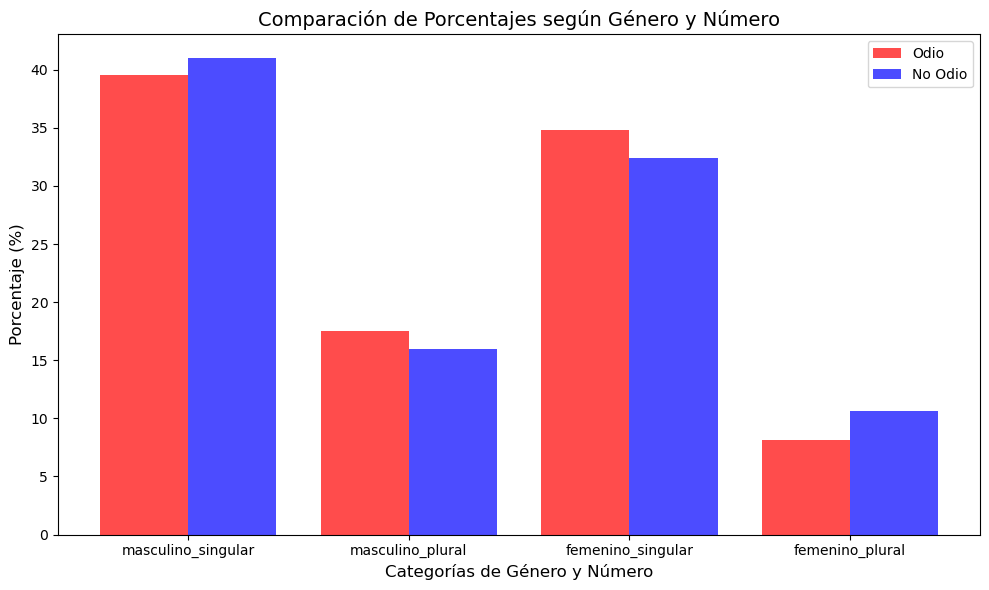

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creamos un DataFrame para facilitar la comparación
df = pd.DataFrame({
    "Categoría": porcentajes_odio.keys(),
    "Porcentaje_Odio": porcentajes_odio.values(),
    "Porcentaje_NO_Odio": porcentajes_NO_odio.values()
})

# Visualización: Comparamos mediante gráfico de barras el porcentaje de cada una de las categorias
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(df))  # Posiciones en el eje x
width = 0.4  # Ancho de las barras

ax.bar([pos - width / 2 for pos in x], df["Porcentaje_Odio"], width=width, label="Odio", color="red", alpha=0.7)
ax.bar([pos + width / 2 for pos in x], df["Porcentaje_NO_Odio"], width=width, label="No Odio", color="blue", alpha=0.7)

# Configuramos el gráfico
ax.set_xticks(x)
ax.set_xticklabels(df["Categoría"])
ax.set_xlabel("Categorías de Género y Número", fontsize=12)
ax.set_ylabel("Porcentaje (%)", fontsize=12)
ax.set_title("Comparación de Porcentajes según Género y Número", fontsize=14)
ax.legend()

# Mostramos el gráfico
plt.tight_layout()
plt.show()

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr> En este caso al no haber guardado los diccionarios fila por fila, como en los casos anteriores, y al haberlos guardados de forma global, vamos a usar otra forma para comparar estos diccionarios. Para ver de forma más clara los porcentajes de género y número en cada grupo (odio y NO odio), hemos creado un gráfico, donde se puede ver de forma clara que género y número se utilizan más en cada tipo de comentario: el número más utilizado sería el singular y el género el masculino.

Para poder visualizar dichos gráficos, en primer lugar pasamos los diccionarios a una dataframe para poderlos tratar y mostrar de forma más sencilla. Posteriormente, se ha usado la funcion plt de la librería matplotlib para poder mostrar estos porcentajes extraídos de los anteriores ejercicios (ejercicio 8).

También cabe destacar, que para el caso de los diferentes tipos de entidades (ejercicio 9), la muestra de su gráfica se haría muy similar a este.


In [ ]:
# Creamos una función para obtener la longitud de las palabras en las keys del diccionario
def longitud_palabra(lema):
    return len(lema)

# Calculamos la longitud de las palabras (lemas) para cada grupo
longitudes_odio = [longitud_palabra(lema) for lema in conteos_odio.keys()]
longitudes_NO_odio = [longitud_palabra(lema) for lema in conteos_NO_odio.keys()]

# Calculamos las longitudes medias de las palabras en cada grupo
media_odio = np.mean(longitudes_odio)
media_NO_odio = np.mean(longitudes_NO_odio)

# Mostramos las longitudes medias
print(f"Longitud media de las palabras (lemas) en comentarios de odio: {media_odio:.2f}")
print(f"Longitud media de las palabras (lemas) en comentarios de NO odio: {media_NO_odio:.2f}")

Longitud media de las palabras (lemas) en comentarios de odio: 7.21
Longitud media de las palabras (lemas) en comentarios de NO odio: 7.91


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr> Por último (ejercicio 10), una vez extraída la lista de los lemas más frecuentes en cada uno de los dos grupos (odio y NO odio), una buena forma de saber si un comentario es de odio o NO seria por la longitud de sus palabras. Aunque en este caso no haya una diferencia muy significativa, se puede ver como en los comentarios de odio se suelen utilizar palabras más cortas que en los comentarios sin odio.

Para finalizar, hemos podido comprobar gracias a los t-test Student, gráficas y otros datos, como cada uno de los resultados obtenidos en las diferentes actividades y sus respectivos análisis son buenas formas para poder determinar sin un "comentario" posee odio o no odio, y por supuesto, como su análisis en conjunto nos ayuda a tener más información y ayudarnos a decidir cuando un comentario puede tener una de estas dos características.
